Author: Shankar J  
Website: https://shankar-jayaraj.github.io/  
LinkedIn: https://www.linkedin.com/in/drshankarj  
Licensed under CC BY-NC-SA 4.0. 

## 1. Foundation: Role of Linear Algebra in Data Representation

Linear algebra serves as the mathematical backbone for representing and manipulating data in AI and data science applications. 
Every dataset can be conceptualized as a matrix where rows represent observations and columns represent features.

In [26]:
# Cell 1: Import Essential Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.linalg import svd, eig
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

print("Linear Algebra for Data Science - Module 2")
print("=" * 50)


Linear Algebra for Data Science - Module 2


In [27]:
# Step 1: Manual creation from fundamentals
student_data = np.array([
    [170, 65, 20],  # Student 1
    [165, 58, 19],  # Student 2
    [180, 75, 21]   # Student 3
])

print("Original Data Matrix A:")
print(student_data)
print(f"Shape: {student_data.shape}")
print(f"Each row represents one student")
print(f"Each column represents one feature")


Original Data Matrix A:
[[170  65  20]
 [165  58  19]
 [180  75  21]]
Shape: (3, 3)
Each row represents one student
Each column represents one feature


## 2. Matrix Decomposition Fundamentals

### Understanding Matrix Factorisation

Matrix decomposition breaks down a complex matrix into simpler, more interpretable components. \
The fundamental concept states that any matrix can be expressed as a product of matrices with specific properties.

**Key Insight:** Just as we factor numbers (12 = 3 × 4), we can factor matrices to reveal hidden structures in data.

### Types of Matrix Decomposition

1. **LU Decomposition:** A = LU (Lower × Upper triangular matrices)
2. **QR Decomposition:** A = QR (Orthogonal × Upper triangular)
3. **Eigendecomposition:** A = PΛP⁻¹ (Eigenvectors × Diagonal × Inverse)
4. **Singular Value Decomposition:** A = UΣV^T (Most general form)




In [28]:
# Cell 3: Matrix Decomposition Fundamentals
# Starting with eigendecomposition for symmetric matrices

# Create a symmetric matrix for demonstration
symmetric_matrix = np.array([
    [4, 2],
    
    [2, 3]
])

print("Symmetric Matrix A:")
print(symmetric_matrix)

# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(symmetric_matrix)

print("\nEigenvalues (λ):")
print(eigenvalues)
print("\nEigenvectors (columns of P):")
print(eigenvectors)

# Verify: A * v = λ * v
print("\nVerification: A * v₁ = λ₁ * v₁")
v1 = eigenvectors[:, 0]
Av1 = symmetric_matrix @ v1
lambda1_v1 = eigenvalues[0] * v1
print(f"A*v₁: {Av1}")
print(f"λ₁*v₁: {lambda1_v1}")
print(f"Difference: {np.allclose(Av1, lambda1_v1)}")

Symmetric Matrix A:
[[4 2]
 [2 3]]

Eigenvalues (λ):
[5.56155281 1.43844719]

Eigenvectors (columns of P):
[[ 0.78820544 -0.61541221]
 [ 0.61541221  0.78820544]]

Verification: A * v₁ = λ₁ * v₁
A*v₁: [4.38364617 3.4226475 ]
λ₁*v₁: [4.38364617 3.4226475 ]
Difference: True




### 3. Singular Value Decomposition (SVD)

SVD is the most fundamental matrix decomposition, stating that any m×n matrix A can be written a:

**A = UΣV^T**

Where:
- U: m×m orthogonal matrix (left singular vectors
- Σ: m×n diagonal matrix (singular values)
- V^T: n×n orthogonal matrix transpose (right singular vectors)

**Manual Calculation Process:**

For matrix A, we calculate:
1. A^T A to find V and singular values
2. AA^T to find U
3. Singular values σᵢ = √(eigenvalues of A^T A)

### SVD Implementation from Scratch
# Create a simple 2x3 matrix for SVD demonstration

In [29]:
A = np.array([
    [3, 2, 2],
    [2, 3, -2]
])

print("Matrix A (2x3):")
print(A)
print(f"Shape: {A.shape}")

Matrix A (2x3):
[[ 3  2  2]
 [ 2  3 -2]]
Shape: (2, 3)


In [30]:
# Step 1: Compute A^T * A
AtA = A.T @ A
print("\nA^T * A:")
print(AtA)


A^T * A:
[[13 12  2]
 [12 13 -2]
 [ 2 -2  8]]


In [31]:

# Step 2: Find eigenvalues and eigenvectors of A^T * A
eigenvals_AtA, V = np.linalg.eig(AtA)
print("\nEigenvalues of A^T * A:")
print(eigenvals_AtA)



Eigenvalues of A^T * A:
[2.50000000e+01 3.44694725e-15 9.00000000e+00]


In [32]:

# Step 3: Compute singular values (square root of eigenvalues)
singular_values = np.sqrt(eigenvals_AtA)
print("\nSingular values:")
print(singular_values)




Singular values:
[5.00000000e+00 5.87107081e-08 3.00000000e+00]


In [33]:
# Step 4: Sort in descending order
idx = np.argsort(singular_values)[::-1]
singular_values = singular_values[idx]
V = V[:, idx]

print("\nSorted singular values:")
print(singular_values)


Sorted singular values:
[5.00000000e+00 3.00000000e+00 5.87107081e-08]


#### Complete SVD using NumPy

In [34]:
U, sigma, Vt = np.linalg.svd(A, full_matrices=True)

print("SVD Components:")
print("U (left singular vectors):")
print(U)
print(f"Shape: {U.shape}")

print("\nΣ (singular values):")
print(sigma)
print(f"Shape: {sigma.shape}")

print("\nV^T (right singular vectors transposed):")
print(Vt)
print(f"Shape: {Vt.shape}")



# Reconstruct original matrix
Sigma = np.zeros((A.shape[0], A.shape[1]))
Sigma[:A.shape[0], :A.shape[0]] = np.diag(sigma)
A_reconstructed = U @ Sigma @ Vt

print("\nReconstructed A = U * Σ * V^T:")
print(A_reconstructed)
print(f"\nReconstruction accurate: {np.allclose(A, A_reconstructed)}")

SVD Components:
U (left singular vectors):
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
Shape: (2, 2)

Σ (singular values):
[5. 3.]
Shape: (2,)

V^T (right singular vectors transposed):
[[-7.07106781e-01 -7.07106781e-01 -6.47932334e-17]
 [-2.35702260e-01  2.35702260e-01 -9.42809042e-01]
 [-6.66666667e-01  6.66666667e-01  3.33333333e-01]]
Shape: (3, 3)

Reconstructed A = U * Σ * V^T:
[[ 3.  2.  2.]
 [ 2.  3. -2.]]

Reconstruction accurate: True


### 4. Spectral Decomposition

### Eigendecomposition of Symmetric Matrices

Spectral decomposition applies specifically to symmetric matrices, where A = QΛQ^T. \
This is a special case of eigendecomposition with guaranteed real eigenvalues and orthogonal eigenvectors.

**Key Properties:**
- All eigenvalues are real
- Eigenvectors are orthogonal
- Matrix can be diagonalised

In [35]:

# Create a meaningful symmetric matrix (covariance-like)
np.random.seed(42)
data = np.random.randn(100, 3)
cov_matrix = np.cov(data.T)

print("Covariance Matrix (Symmetric):")
print(cov_matrix)
print(f"Is symmetric: {np.allclose(cov_matrix, cov_matrix.T)}")

# Perform spectral decomposition
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)  # 'eigh' for symmetric matrices

print(f"\nEigenvalues: {eigenvalues}")
print(f"Eigenvectors:\n{eigenvectors}")

# Verify orthogonality of eigenvectors
orthogonality_check = eigenvectors.T @ eigenvectors
print(f"\nEigenvectors orthogonality check (should be identity):")
print(orthogonality_check)
print(f"Is orthogonal: {np.allclose(orthogonality_check, np.eye(3))}")

Covariance Matrix (Symmetric):
[[ 0.68029352 -0.03927641 -0.1108006 ]
 [-0.03927641  0.9586369  -0.1348594 ]
 [-0.1108006  -0.1348594   1.23856849]]
Is symmetric: True

Eigenvalues: [0.64493904 0.92688528 1.30567458]
Eigenvectors:
[[ 0.94973096 -0.27861938 -0.14276678]
 [ 0.21623661  0.91357208 -0.34442383]
 [ 0.22639089  0.29623857  0.9278954 ]]

Eigenvectors orthogonality check (should be identity):
[[ 1.00000000e+00 -2.72478271e-17  6.79834072e-18]
 [-2.72478271e-17  1.00000000e+00 -1.89719595e-16]
 [ 6.79834072e-18 -1.89719595e-16  1.00000000e+00]]
Is orthogonal: True


Original covariance matrix:
[[ 0.68029352 -0.03927641 -0.1108006 ]
 [-0.03927641  0.9586369  -0.1348594 ]
 [-0.1108006  -0.1348594   1.23856849]]

Reconstructed matrix (Q * Λ * Q^T):
[[ 0.68029352 -0.03927641 -0.1108006 ]
 [-0.03927641  0.9586369  -0.1348594 ]
 [-0.1108006  -0.1348594   1.23856849]]

Reconstruction accurate: True


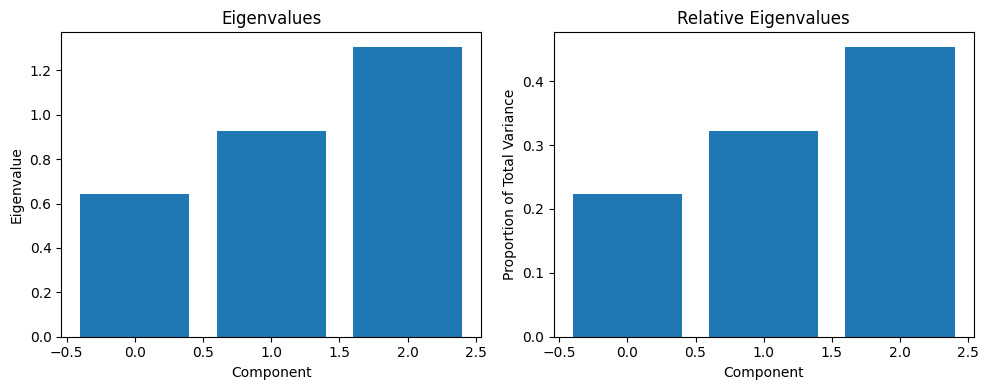

In [36]:

# Spectral Decomposition Reconstruction
# Demonstrating A = Q * Λ * Q^T

# Reconstruct using spectral decomposition
Lambda = np.diag(eigenvalues)
reconstructed = eigenvectors @ Lambda @ eigenvectors.T

print("Original covariance matrix:")
print(cov_matrix)
print("\nReconstructed matrix (Q * Λ * Q^T):")
print(reconstructed)
print(f"\nReconstruction accurate: {np.allclose(cov_matrix, reconstructed)}")

# Visualize eigenvalues
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.bar(range(len(eigenvalues)), eigenvalues)
plt.title('Eigenvalues')
plt.xlabel('Component')
plt.ylabel('Eigenvalue')

plt.subplot(1, 2, 2)
plt.bar(range(len(eigenvalues)), eigenvalues/np.sum(eigenvalues))
plt.title('Relative Eigenvalues')
plt.xlabel('Component')
plt.ylabel('Proportion of Total Variance')
plt.tight_layout()
plt.show()


### 5. Principal Component Analysis (PCA)

### Paper-Pen Method: Understanding PCA Fundamentals

PCA is a dimensionality reduction technique that finds directions of maximum variance in data. The mathematical foundation relies on eigendecomposition of the covariance matrix.

**Step-by-Step Process:**
1. Center the data (subtract mean)
2. Compute covariance matrix
3. Find eigenvalues and eigenvector
4. Sort by eigenvalue magnitude
5. Select top k components
6. Transform data to new space

In [37]:

# PCA Implementation from Scratch
# Building PCA step by step

# Generate sample dataset
np.random.seed(42)
n_samples = 200
# Create correlated data
X1 = np.random.randn(n_samples)
X2 = 0.5 * X1 + 0.5 * np.random.randn(n_samples)  # Correlated with X1
X3 = 0.1 * np.random.randn(n_samples)  # Less variance

data = np.column_stack([X1, X2, X3])
print(f"Original data shape: {data.shape}")

# Step 1: Center the data
data_centered = data - np.mean(data, axis=0)
print("Data centered (mean should be ~0):")
print(f"Means after centering: {np.mean(data_centered, axis=0)}")

# Step 2: Compute covariance matrix
cov_matrix = np.cov(data_centered.T)
print(f"\nCovariance matrix:")
print(cov_matrix)

Original data shape: (200, 3)
Data centered (mean should be ~0):
Means after centering: [3.88578059e-17 2.18922103e-17 1.11022302e-18]

Covariance matrix:
[[ 0.86676829  0.4770995  -0.01241935]
 [ 0.4770995   0.50395156 -0.00781016]
 [-0.01241935 -0.00781016  0.00988119]]


In [38]:
### PCA Eigendecomposition
# Finding principal components

# Step 3: Eigendecomposition of covariance matrix
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Step 4: Sort by eigenvalue (descending)
idx = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[idx]
eigenvectors_sorted = eigenvectors[:, idx]

print("Eigenvalues (sorted):")
print(eigenvalues_sorted)
print("\nEigenvectors (Principal Components):")
print(eigenvectors_sorted)

# Calculate explained variance ratio
explained_variance_ratio = eigenvalues_sorted / np.sum(eigenvalues_sorted)
print("\nExplained Variance Ratio:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio:.4f} ({ratio*100:.2f}%)")

Eigenvalues (sorted):
[1.19596533 0.174938   0.00969772]

Eigenvectors (Principal Components):
[[-0.82316891 -0.56766319  0.01230638]
 [-0.56766209  0.82325232  0.00392136]
 [ 0.01235727  0.00375793  0.99991658]]

Explained Variance Ratio:
PC1: 0.8663 (86.63%)
PC2: 0.1267 (12.67%)
PC3: 0.0070 (0.70%)


Original data shape: (200, 3)
Transformed data shape: (200, 2)
Dimensionality reduced from 3 to 2


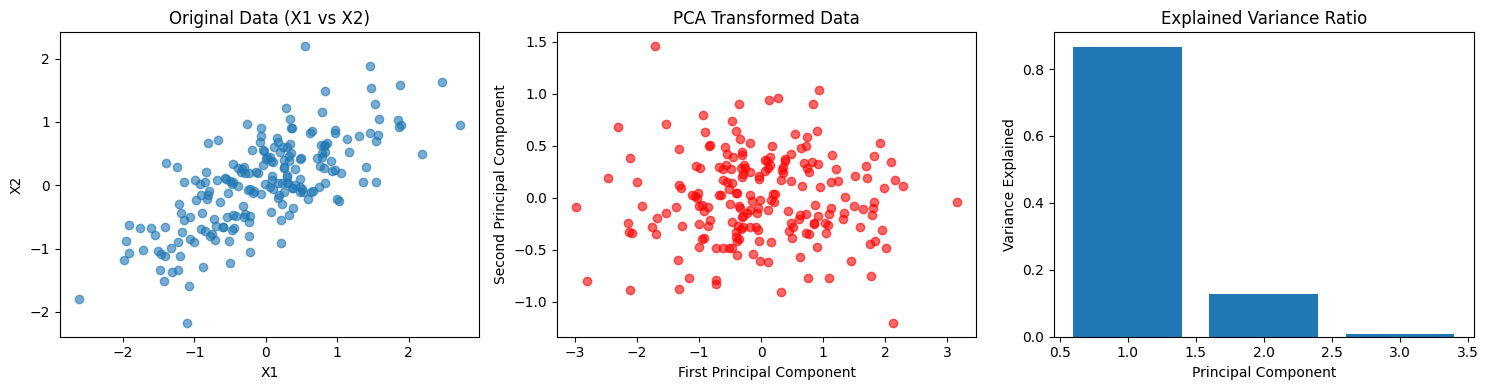

In [39]:

# PCA Transformation and Visualization
# Applying dimensionality reduction

# Step 5: Select number of components (e.g., 2 for visualization)
n_components = 2
principal_components = eigenvectors_sorted[:, :n_components]

# Step 6: Transform data
data_pca = data_centered @ principal_components

print(f"Original data shape: {data.shape}")
print(f"Transformed data shape: {data_pca.shape}")
print(f"Dimensionality reduced from {data.shape[1]} to {n_components}")

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Original data (first two dimensions)
axes[0].scatter(data[:, 0], data[:, 1], alpha=0.6)
axes[0].set_title('Original Data (X1 vs X2)')
axes[0].set_xlabel('X1')
axes[0].set_ylabel('X2')

# PCA transformed data
axes[1].scatter(data_pca[:, 0], data_pca[:, 1], alpha=0.6, color='red')
axes[1].set_title('PCA Transformed Data')
axes[1].set_xlabel('First Principal Component')
axes[1].set_ylabel('Second Principal Component')

# Explained variance
axes[2].bar(range(1, len(explained_variance_ratio)+1), explained_variance_ratio)
axes[2].set_title('Explained Variance Ratio')
axes[2].set_xlabel('Principal Component')
axes[2].set_ylabel('Variance Explained')

plt.tight_layout()
plt.show()



### 6. SVD-based PCA Implementation

#### Connecting SVD and PCA

PCA can be computed using SVD without explicitly calculating the covariance matrix. \
For centered data matrix X, the SVD X = UΣV^T provides:
- V contains the principal components
- Σ² contains the eigenvalues (scaled)
- U gives the transformed data (scaled)

In [40]:

# PCA using SVD
# Alternative implementation avoiding covariance matrix computation

# Using the same centered data from previous cells
print("PCA using SVD approach:")

# Perform SVD on centered data
U, sigma, Vt = np.linalg.svd(data_centered, full_matrices=False)

# Principal components are columns of V (rows of Vt)
principal_components_svd = Vt.T

print("Principal components from SVD:")
print(principal_components_svd)

# Transform data using SVD
data_pca_svd = data_centered @ principal_components_svd

print(f"\nTransformed data shape: {data_pca_svd.shape}")

# Eigenvalues from SVD (need to scale by n-1 for sample covariance)
eigenvalues_svd = (sigma ** 2) / (len(data_centered) - 1)
explained_variance_svd = eigenvalues_svd / np.sum(eigenvalues_svd)

print("Explained variance ratio from SVD:")
for i, ratio in enumerate(explained_variance_svd):
    print(f"PC{i+1}: {ratio:.4f} ({ratio*100:.2f}%)")



PCA using SVD approach:
Principal components from SVD:
[[-0.82316891 -0.56766319 -0.01230638]
 [-0.56766209  0.82325232 -0.00392136]
 [ 0.01235727  0.00375793 -0.99991658]]

Transformed data shape: (200, 3)
Explained variance ratio from SVD:
PC1: 0.8663 (86.63%)
PC2: 0.1267 (12.67%)
PC3: 0.0070 (0.70%)


In [41]:

# Comparing Eigendecomposition vs SVD for PCA
# Verification that both methods yield identical results

print("Comparison of PCA methods:")
print("="*40)

# Compare principal components (signs may differ)
pc_comparison = np.abs(principal_components[:, 0]) - np.abs(principal_components_svd[:, 0])
print(f"Principal component difference: {np.max(np.abs(pc_comparison)):.10f}")

# Compare explained variance ratios
variance_comparison = explained_variance_ratio - explained_variance_svd
print(f"Explained variance difference: {np.max(np.abs(variance_comparison)):.10f}")

# Compare transformed data (accounting for potential sign differences)
data_comparison = np.abs(data_pca[:, 0]) - np.abs(data_pca_svd[:, 0])
print(f"Transformed data difference: {np.max(np.abs(data_comparison)):.10f}")

print("\nBoth methods produce equivalent results!")

Comparison of PCA methods:
Principal component difference: 0.0000000000
Explained variance difference: 0.0000000000
Transformed data difference: 0.0000000000

Both methods produce equivalent results!


### 7. Practical Application: Image Compression using SVD

Original image shape: (50, 50)
SVD components shapes:
U: (50, 50), Sigma: (50,), Vt: (50, 50)


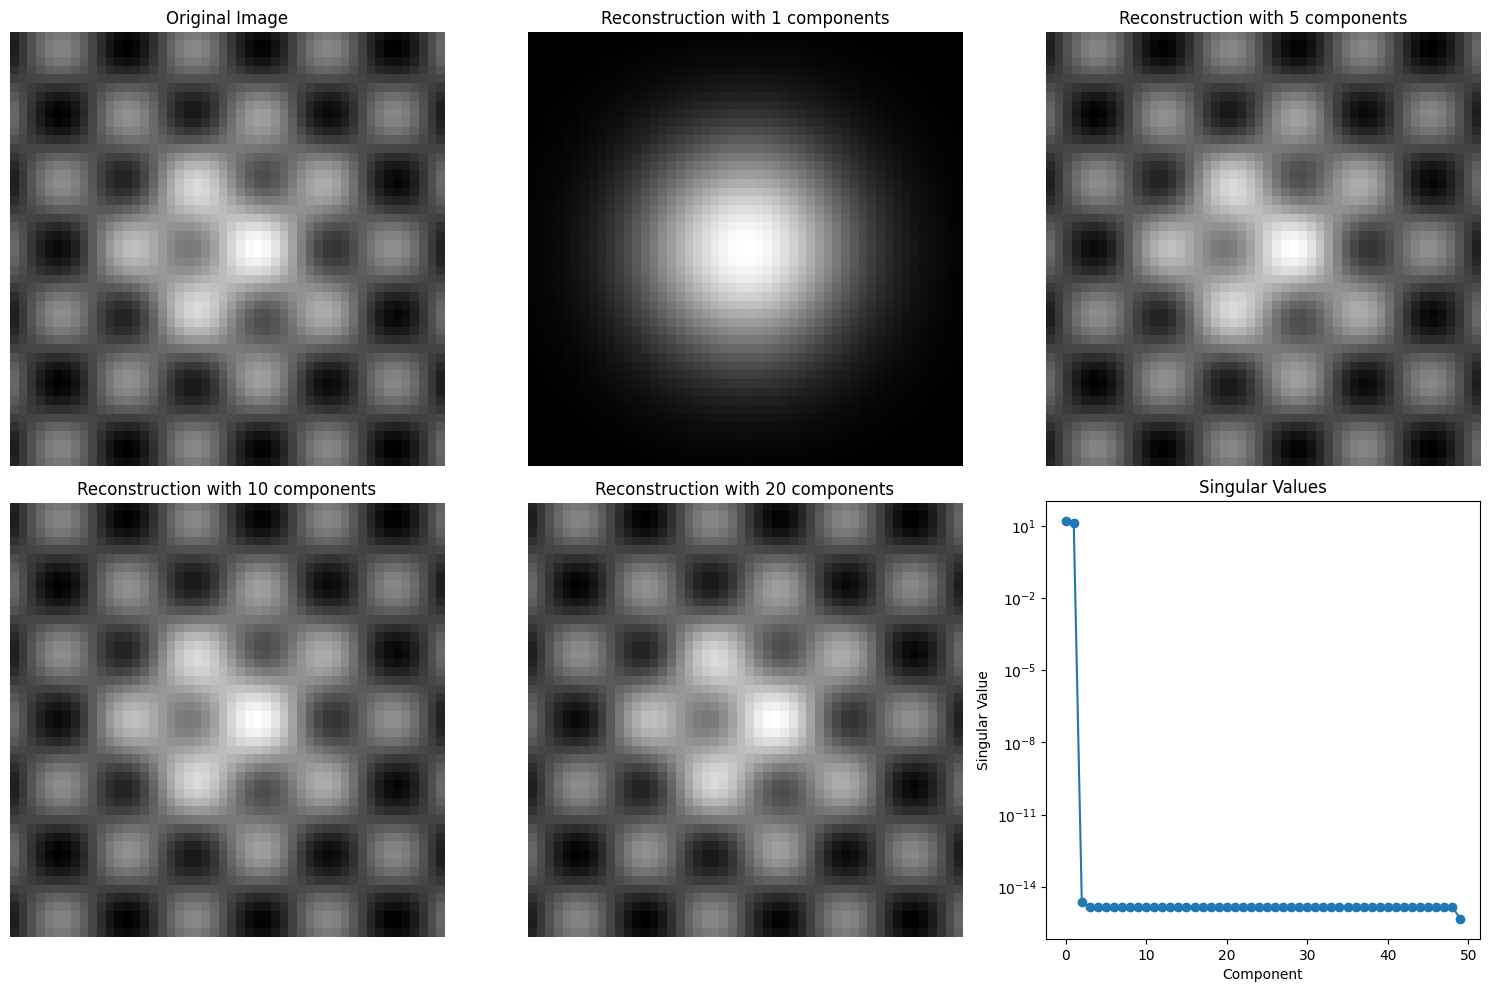

Components:  1, Compression ratio: 24.75x
Components:  5, Compression ratio: 4.95x
Components: 10, Compression ratio: 2.48x
Components: 20, Compression ratio: 1.24x


In [42]:

# Cell 13: Real-world Application - Image Compression
# Demonstrating SVD for dimensionality reduction in practice

# Create a simple synthetic "image" for demonstration
image_size = 50
x = np.linspace(-2, 2, image_size)
y = np.linspace(-2, 2, image_size)
X, Y = np.meshgrid(x, y)

# Create a simple pattern
synthetic_image = np.exp(-(X**2 + Y**2)) + 0.5 * np.sin(5*X) * np.cos(5*Y)

print(f"Original image shape: {synthetic_image.shape}")

# Perform SVD
U, sigma, Vt = np.linalg.svd(synthetic_image, full_matrices=False)

print(f"SVD components shapes:")
print(f"U: {U.shape}, Sigma: {sigma.shape}, Vt: {Vt.shape}")

# Reconstruct with different numbers of components
components = [1, 5, 10, 20]
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Original image
axes[0, 0].imshow(synthetic_image, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# Reconstructions with different components
for i, k in enumerate(components):
    reconstructed = U[:, :k] @ np.diag(sigma[:k]) @ Vt[:k, :]
    
    row = (i + 1) // 3
    col = (i + 1) % 3
    
    axes[row, col].imshow(reconstructed, cmap='gray')
    axes[row, col].set_title(f'Reconstruction with {k} components')
    axes[row, col].axis('off')

# Plot singular values
axes[1, 2].plot(sigma, 'o-')
axes[1, 2].set_title('Singular Values')
axes[1, 2].set_xlabel('Component')
axes[1, 2].set_ylabel('Singular Value')
axes[1, 2].set_yscale('log')

plt.tight_layout()
plt.show()

# Calculate compression ratios
original_size = synthetic_image.size
for k in components:
    compressed_size = k * (U.shape[0] + Vt.shape[1] + 1)  # +1 for singular value
    compression_ratio = original_size / compressed_size
    print(f"Components: {k:2d}, Compression ratio: {compression_ratio:.2f}x")

### 9. Summary and Key Takeaways

### Mathematical Foundations Mastered

Through this hands-on approach, we have covered the essential mathematical foundations for AI and Data Science:

1. **Matrix Representation**: Understanding data as matrices enables efficient computation and analysis
2. **Matrix Decomposition**: Breaking complex matrices into interpretable components reveals data structure
3. **SVD**: The most general decomposition technique applicable to any matrix
4. **Spectral Decomposition**: Specialized technique for symmetric matrices with guaranteed real eigenvalues
5. **PCA**: Practical dimensionality reduction technique based on variance maximization

### Pedagogical Approach Benefits

The paper-pen to Jupyter notebook methodology provides several advantages for teaching linear algebra concepts:
- **Conceptual Understanding**: Starting with manual calculations builds intuition
- **Practical Implementation**: Jupyter notebooks enable immediate application
- **Visual Learning**: Graphical representations enhance comprehension
- **Progressive Complexity**: Building from fundamentals to applications

### Applications in AI and Data Science

These mathematical tools form the foundation for advanced AI and Data Science techniques:
- **Dimensionality Reduction**: PCA for feature extraction and visualization
- **Data Compression**: SVD for efficient storage and transmission
- **Machine Learning**: Matrix operations in neural networks and optimization
- **Computer Vision**: Image processing and pattern recognition